In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [3]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [4]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [5]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
# 모델을 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05550, saving model to ./model/01-0.0555.hdf5

Epoch 00002: val_loss improved from 0.05550 to 0.04031, saving model to ./model/02-0.0403.hdf5

Epoch 00003: val_loss improved from 0.04031 to 0.03380, saving model to ./model/03-0.0338.hdf5

Epoch 00004: val_loss did not improve from 0.03380

Epoch 00005: val_loss improved from 0.03380 to 0.03195, saving model to ./model/05-0.0319.hdf5

Epoch 00006: val_loss improved from 0.03195 to 0.02907, saving model to ./model/06-0.0291.hdf5

Epoch 00007: val_loss improved from 0.02907 to 0.02891, saving model to ./model/07-0.0289.hdf5

Epoch 00008: val_loss did not improve from 0.02891

Epoch 00009: val_loss improved from 0.02891 to 0.02641, saving model to ./model/09-0.0264.hdf5

Epoch 00010: val_loss did not improve from 0.02641

Epoch 00011: val_loss improved from 0.02641 to 0.02578, saving model to ./model/11-0.0258.hdf5

Epoch 00012: val_loss did not improve from 0.02578

Epoch 00013: val_loss did n

In [8]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 2s 164us/step

 Test Accuracy: 0.9918


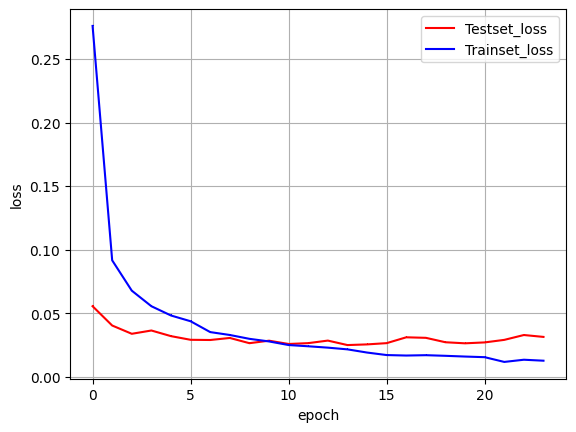

In [17]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=',', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker=',', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()